In [8]:
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import load_model


In [9]:
data = pd.read_csv('graficas\\2015-NH085-normal\\NH085_Energy.csv')
X = data[['X', 'Y', 'Z', 'Temp']]
data['Comportamiento'] = 1
y = data['Comportamiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
#Entrada
entrada = keras.Input(shape=(4,))

x = keras.layers.Flatten()(entrada)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
salida = keras.layers.Dense(1, activation='linear')(x)
modelo3 = keras.Model(inputs = entrada, outputs = salida)

In [11]:
modelo3 = load_model('modelo_entrenado.h5')


In [3]:
modelo3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy','mean_squared_error'])
modelo3.summary()
historial3 = modelo3.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9963 - loss: 0.0087 - mean_squared_error: 0.0087 - val_accuracy: 1.0000 - val_loss: 1.5277e-07 - val_mean_squared_error: 1.5277e-07
Epoch 2/20
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 1.0000 - loss: 1.4042e-06 - mean_squared_error: 1.4042e-06 - val_accuracy: 1.0000 - val_loss: 7.4859e-11 - val_mean_squared_error: 7.4859e-11
Epoch 3/20
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 1.0000 - loss: 3.7244e-06 - mean_squared_error: 3.7244e-06 - val_accuracy: 1.0000 - val_loss: 5.7114e-06 - val_mean_squared_error: 5.7114e-06
Epoch 4/20
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 17s 912us/step - accuracy: 1.0000 - loss: 1.0269e-06 - mean_squared_error: 1.0269e-06 - val_accuracy: 1.0000 - val_loss: 2.7481e-07 - val_mean_squared_error: 2.7481e-07
Epoch 5/20
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 17s 894us/step - accuracy: 1.0000 - loss: 8.0357e-07 - mean_squared_error: 8.0357e-07 - val_accuracy: 1.0000 - val_los

In [4]:
modelo3.save('modelo_entrenado.h5')

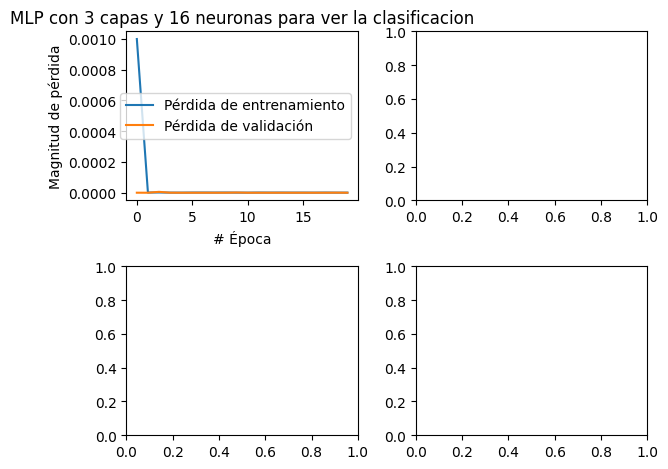

In [5]:
#MLP con 4 capas y varias neuronas
loss3 = historial3.history['loss']
val_loss3 = historial3.history['val_loss']

# Graficar la pérdida de entrenamiento y validación
fig, axs = plt.subplots(2, 2)
axs[0][0].set_title('MLP con 3 capas y 16 neuronas para ver la clasificacion')
axs[0][0].set_xlabel("# Época")
axs[0][0].set_ylabel("Magnitud de pérdida")
axs[0][0].plot(loss3, label='Pérdida de entrenamiento')
axs[0][0].plot(val_loss3, label='Pérdida de validación')
axs[0][0].legend()

fig.tight_layout()
plt.show()

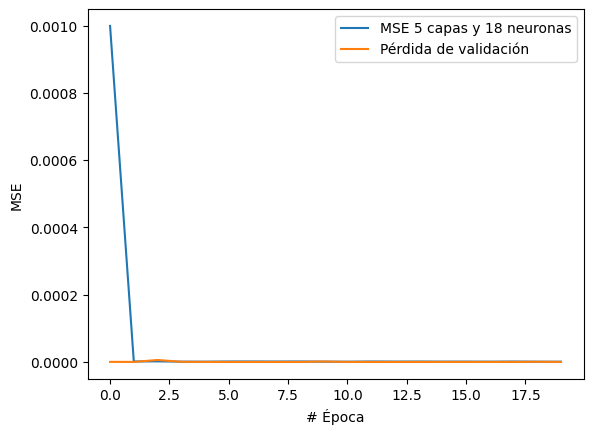

In [6]:
#MLP con 4 capas y varias neuronas
mse3 = historial3.history['mean_squared_error']

plt.xlabel("# Época")
plt.ylabel("MSE")
plt.plot(mse3, label='MSE 5 capas y 18 neuronas')
plt.plot(historial3.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.show()